In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline 

data = pd.read_csv('data_learn.csv', header=0, na_values='?', delimiter=';')

#Количество строк и столбцов:
data.shape

(300, 20)

In [2]:
#Первые пять строк данных:
data.head()

,ID,ФИО,Дата рождения,Семейное положение,Дети,Отдел,Должность,Рабочий стаж (лет),Наличие правонарушений/ судимостей,Наличие выговоров по трудовой дисциплине,Трудовые заслуги,Образование,Дополнительная квалификация,Исполнительность/ дисциплинированность,Коммуникабельность,Стрессоустойчивость,Лидерство,Порядочность/ честность,Энергичность,Кандидат на увольнение
0,1,Иванов Иван Иванович,03.08.1969,холост,есть дети,Отдел эксплуатации автоматизированных систем к...,Мастер участка службы подстанций,25,Нет,Да,Нет,высшее образование - бакалавриат,Нет,10,5,7,2,2,1,0
1,2,Петров Александр Федорович,04.05.1968,разведен,NaN,Западный участок,Начальник района электрических сетей,11,Нет,Нет,Да,высшее образование - специалитет магистратура,Нет,0,5,4,0,10,1,0
2,3,Васильев Александр Николаевич,24.05.1968,холост,есть дети,Отдел эксплуатации ИТ (ОЭ ИТ),Технический IT-специалист,5,Нет,Да,Нет,высшее образование - бакалавриат,Нет,5,0,10,9,4,6,1
3,4,Осипов Марк Михайлович,14.10.1988,разведен,есть дети,Отдел эксплуатации телекоммуникаций (ОЭ ТК),Инженер 1 категории управления технологическог...,10,Нет,Нет,Нет,высшее образование - бакалавриат,Да,7,8,4,2,8,1,0
4,5,Устинов Ипполит Антонинович,03.03.1970,холост,NaN,Восточный участок,Специалист Центра обслуживания потребителей,5,Нет,Нет,Нет,высшее образование - бакалавриат,Нет,1,1,1,10,3,0,0


In [3]:
# Получим некоторую сводную информацию по всей таблице. 
# По умолчанию будет выдана информация только для количественных признаков. 
# Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), 
# минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) 
# и верхнего (75%) квартилей:
data.describe()

,ID,Рабочий стаж (лет),Исполнительность/ дисциплинированность,Коммуникабельность,Стрессоустойчивость,Лидерство,Порядочность/ честность,Энергичность,Кандидат на увольнение
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,11.343333,4.870000,4.853333,5.116667,4.970000,4.920000,4.856667,0.256667
std,86.746758,6.911683,3.122863,3.188371,2.968574,3.172167,3.012838,3.166947,0.437524
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.750000,5.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000
50%,150.500000,11.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.000000
75%,225.250000,17.000000,8.000000,8.000000,7.250000,8.000000,7.000000,8.000000,1.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


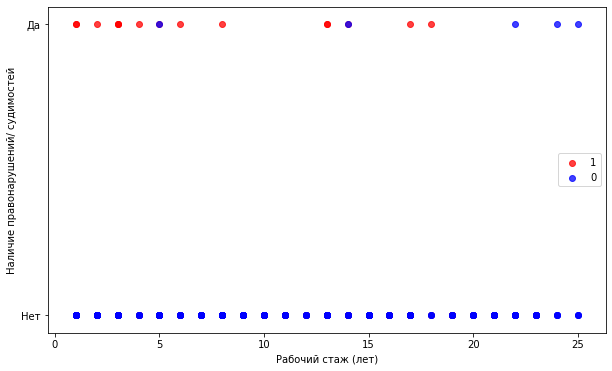

In [4]:
# Диаграмма расеивания для признаков 'Рабочий стаж (лет)' и 'Наличие правонарушений/ судимостей'
# 1 - является кандидатом к увольнению; 0 - нет
col1 = 'Рабочий стаж (лет)'
col2 = 'Наличие правонарушений/ судимостей'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['Кандидат на увольнение'] == 1],
            data[col2][data['Кандидат на увольнение'] == 1],
            alpha=0.75,
            color='red',
            label='1')

plt.scatter(data[col1][data['Кандидат на увольнение'] == 0],
            data[col2][data['Кандидат на увольнение'] == 0],
            alpha=0.75,
            color='blue',
            label='0')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

In [5]:
# ГОТОВИМ ДАННЫЕ
# Алгоритмы машинного обучения из библиотеки scikit-learn не работают напрямую с категориальными признаками и данными, 
# в которых имеются пропущенные значения. Поэтому вначале подготовим наши данные

#Убираем не нужые столбцы
X = data.drop('ФИО', axis='columns') 
X = X.drop('Дата рождения', axis='columns') 
X = X.drop('ID', axis='columns') 
X = X.drop('Семейное положение', axis='columns') 
X = X.drop('Отдел', axis='columns') 
X = X.drop('Должность', axis='columns') 
X = X.drop('Дети', axis='columns') 
X = X.drop('Образование', axis='columns') 

In [6]:
#Посмотрим заполнение признаков
X.count(axis=0)

Рабочий стаж (лет)                          300
Наличие правонарушений/ судимостей          300
Наличие выговоров по трудовой дисциплине    300
Трудовые заслуги                            300
Дополнительная квалификация                 300
Исполнительность/ дисциплинированность      300
Коммуникабельность                          300
Стрессоустойчивость                         300
Лидерство                                   300
Порядочность/ честность                     300
Энергичность                                300
Кандидат на увольнение                      300
dtype: int64

In [7]:
# Пропущенных данных нет выделим категориальные признаки и числовые отдельно
categorical_columns = [c for c in X.columns if X[c].dtype.name == 'object']
numerical_columns   = [c for c in X.columns if X[c].dtype.name != 'object']
print('Категориальные признаки: ',categorical_columns)
print('Числовые признаки: ',numerical_columns)

Категориальные признаки:  ['Наличие правонарушений/ судимостей', 'Наличие выговоров по трудовой дисциплине', 'Трудовые заслуги', 'Дополнительная квалификация']
Числовые признаки:  ['Рабочий стаж (лет)', 'Исполнительность/ дисциплинированность', 'Коммуникабельность', 'Стрессоустойчивость', 'Лидерство', 'Порядочность/ честность', 'Энергичность', 'Кандидат на увольнение']


In [8]:
X[categorical_columns].describe()

,Наличие правонарушений/ судимостей,Наличие выговоров по трудовой дисциплине,Трудовые заслуги,Дополнительная квалификация
count,300,300,300,300
unique,2,2,2,2
top,Нет,Нет,Нет,Нет
freq,280,269,264,254


## 

In [9]:
# Категориалные признаки бинарного типа, приведем их к числовому варианту

#Преобразуем 'Дополнительная квалификация' в числ столбец если она есть то 1 нету 0
X.at[X['Дополнительная квалификация'] == 'Нет', 'Дополнительная квалификация'] = 0
X.at[X['Дополнительная квалификация'] != 0, 'Дополнительная квалификация'] = 1


#Преобразуем 'Наличие выговоров по трудовой дисциплине' в числ столбец если она есть то 1 нету 0
X.at[X['Наличие выговоров по трудовой дисциплине'] == 'Нет', 'Наличие выговоров по трудовой дисциплине'] = 0
X.at[X['Наличие выговоров по трудовой дисциплине'] != 0, 'Наличие выговоров по трудовой дисциплине'] = 1


#Преобразуем 'Наличие правонарушений/ судимостей' в числ столбец если она есть то 1 нету 0
X.at[X['Наличие правонарушений/ судимостей'] == 'Нет', 'Наличие правонарушений/ судимостей'] = 0
X.at[X['Наличие правонарушений/ судимостей'] != 0, 'Наличие правонарушений/ судимостей'] = 1


#Преобразуем 'Наличие правонарушений/ судимостей' в числ столбец если она есть то 1 нету 0
X.at[X['Трудовые заслуги'] == 'Нет', 'Трудовые заслуги'] = 0
X.at[X['Трудовые заслуги'] != 0, 'Трудовые заслуги'] = 1


In [10]:
#Из построенных диаграмм видно, что признаки не сильно коррелируют между собой, 
#что впрочем можно также легко установить, посмотрев на корреляционную матрицу. 
#Все ее недиагональные значения по модулю не превосходят 0.4:

matrix = X.copy()
matrix.columns = ['Col' + str(i) for i in range(1, 13)] 

print(matrix.corr())

           Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
Col1   1.000000 -0.050094 -0.007369  0.042576  0.083403  0.071028 -0.015616   
Col2  -0.050094  1.000000  0.172676 -0.057571 -0.076648 -0.018860  0.050098   
Col3  -0.007369  0.172676  1.000000 -0.057961 -0.083681 -0.045557  0.084448   
Col4   0.042576 -0.057571 -0.057961  1.000000  0.099072  0.038429  0.013793   
Col5   0.083403 -0.076648 -0.083681  0.099072  1.000000 -0.005994  0.045767   
Col6   0.071028 -0.018860 -0.045557  0.038429 -0.005994  1.000000  0.139492   
Col7  -0.015616  0.050098  0.084448  0.013793  0.045767  0.139492  1.000000   
Col8  -0.050697  0.039078  0.005111  0.161983 -0.019874  0.027256  0.051284   
Col9   0.075064 -0.027006  0.003216  0.026171  0.018638  0.179553 -0.037472   
Col10 -0.049750 -0.001777 -0.045582 -0.061795 -0.071727  0.058965  0.016879   
Col11  0.027314 -0.021696 -0.026173  0.049185 -0.001190  0.004197  0.126094   
Col12 -0.101126  0.301856  0.276864 -0.099572 -0.059

In [11]:
# Выделим целевой признак отдельно
X = X.drop('Кандидат на увольнение', axis='columns') 
y = data['Кандидат на увольнение']

#Делим данные на обучающую выборку и тестовую 80 на 20 процентов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

In [12]:
#kNN – метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Точность прогноза на тестовом наборе: ', knn.score(X_test,y_test))

Точность прогноза на тестовом наборе:  0.7833333333333333


In [13]:
# SVC – машина опорных векторов- любит нормализации количественных признаков
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

print('Точность прогноза на тестовом наборе: ', svc.score(X_test,y_test))

Точность прогноза на тестовом наборе:  0.7333333333333333


In [14]:
# Метод дерева решений
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train, y_train)

print('Точность прогноза на тренировочном наборе: ', tree_model.score(X_test,y_test))

Точность прогноза на тренировочном наборе:  0.8166666666666667


In [25]:
import graphviz 
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree_model")

'tree_model.pdf'

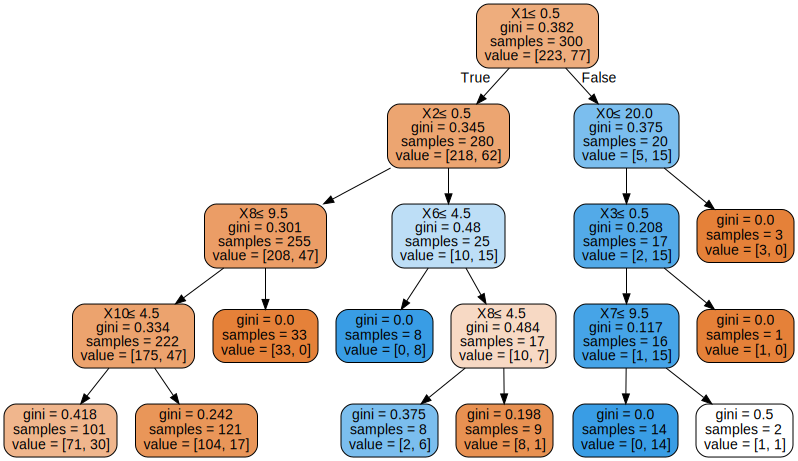

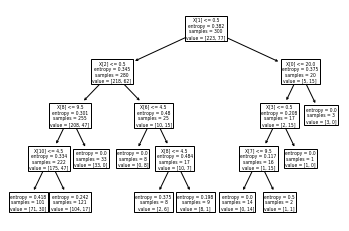

In [26]:

tree.plot_tree(tree_model.fit(X, y)) 
dot_data = tree.export_graphviz(tree_model, out_file=None, 
filled=True, rounded=True,  
 special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [24]:
# Случайный лес
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(X_train, y_train)

print('Точность прогноза на тренировочном наборе: ', rf.score(X_test,y_test))

Точность прогноза на тренировочном наборе:  0.85
